> reference: https://github.com/udacity/CarND-Camera-Calibration/blob/master/camera_calibration.ipynb

In [1]:
!mkdir camera_cal_draw_point

mkdir: camera_cal_draw_point: File exists


In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points
nx = 9
ny = 6

objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        write_name = 'camera_cal_draw_point/{}.jpg'.format(idx)
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        #cv2.waitKey(500)

#cv2.destroyAllWindows()

In [3]:
ls camera_cal_draw_point

0.jpg   10.jpg  12.jpg  16.jpg  18.jpg  2.jpg   4.jpg   6.jpg   8.jpg
1.jpg   11.jpg  13.jpg  17.jpg  19.jpg  3.jpg   5.jpg   7.jpg   9.jpg


In [4]:
!mkdir camera_cal_out

mkdir: camera_cal_out: File exists


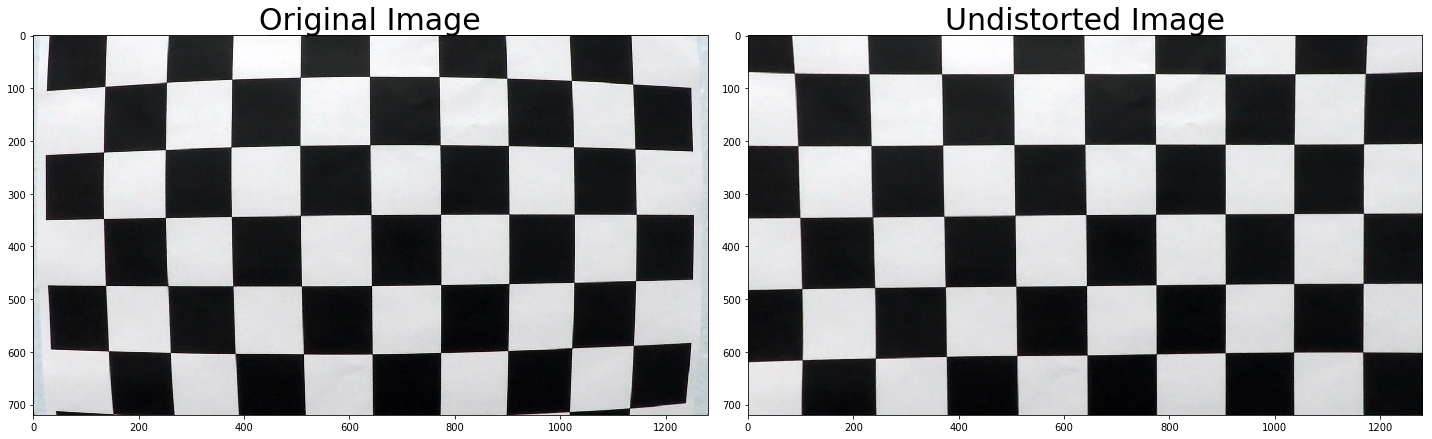

In [7]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
#cv2.imwrite('camera_cal_out/calib1_undist.jpg',dst)
                                                   
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.tight_layout()
f.savefig('camera_cal_out/calib1_undist.jpg');